In [45]:
!jupyter lab paths

Application directory:   G:\BDC\conda\lab\share\jupyter\lab
User Settings directory: C:\Users\Administrator\.jupyter\lab\user-settings
Workspaces directory: C:\Users\Administrator\.jupyter\lab\workspaces


In [ ]:
!pip list

# 任务一：数据探索与预处理（全做）

In [46]:
import pandas as pd

# 显示所有列
pd.set_option('display.max_columns', None)
# 显示所有行
# pd.set_option('display.max_rows', None)
# 设置value的显示长度
pd.set_option('max_colwidth', 100)
# 设置1000列时才换行
pd.set_option('display.width', 1000)


In [47]:
import os,sys
SRC_DIR = os.path.join(os.path.abspath('.'), 'data')
print(SRC_DIR)

c:\Users\Administrator\WPSDrive\205034987\WPS云盘\07 绛亽新学习\01 电子商务\05 20级大四上学期\商务智能实验\notebook\data


## （1）查看所有数据文件，了解每个数据文件的数据项及记录数

首先使用 print() 函数大致浏览每个数据文件的 shape （行列数）和列名

In [48]:
# 保存文件的shape值的字典，后续调用
shapes_dict = {}
# 数据文件路径列表，后续调用
DATA_FILES = []

# 使用 os.listdir 列出目录中的文件
for f in os.listdir(SRC_DIR):
        # 检查文件扩展名和名称，任意不以 _ 开头的 csv 文件都是这次实验的数据文件
        if os.path.splitext(os.path.basename(f))[1] == ".csv" and os.path.basename(f)[0] != "_":
            # 打印分隔线
            print("*" * 150)
            DATA_FILES.append(f)
            # 使用 pandas 读取 csv 文件，使用 utf-8 编码，并设置 low_memory=True 以优化内存使用
            df = pd.read_csv(os.path.join(SRC_DIR, f), encoding='utf-8', low_memory=True)
            # 保存文件的shape值
            shapes_dict[os.path.basename(f)] = df.shape
            # 打印文件信息
            print('\t文件:', str(f), ' —— Shape:', df.shape)
            column_list = df.columns.tolist()
            # 使用map()函数和一个lambda函数，将column_list中的每个子列表（每个子列表包含5个列名）中的列名连接在一起，用逗号和空格分隔
            column_str = '\\\n'.join(map(lambda x: ', '.join(x), (column_list[i:i+5] for i in range(0, len(column_list), 5))))
            print('\t列名: ' + column_str)

print("_"*68, " Good job ! ", "_"*68)

******************************************************************************************************************************************************
	文件: calendar_detail.csv  —— Shape: (10384980, 7)
	列名: listing_id, date, available, price, adjusted_price\
minimum_nights, maximum_nights
******************************************************************************************************************************************************
	文件: listings.csv  —— Shape: (28452, 16)
	列名: id, name, host_id, host_name, neighbourhood_group\
neighbourhood, latitude, longitude, room_type, price\
minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count\
availability_365
******************************************************************************************************************************************************


C:\Windows\Temp\ipykernel_6820\3819509521.py:14: DtypeWarning: Columns (43,61,62,95) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(SRC_DIR, f), encoding='utf-8', low_memory=True)


	文件: listings_detail.csv  —— Shape: (28452, 106)
	列名: id, listing_url, scrape_id, last_scraped, name\
summary, space, description, experiences_offered, neighborhood_overview\
notes, transit, access, interaction, house_rules\
thumbnail_url, medium_url, picture_url, xl_picture_url, host_id\
host_url, host_name, host_since, host_location, host_about\
host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_thumbnail_url\
host_picture_url, host_neighbourhood, host_listings_count, host_total_listings_count, host_verifications\
host_has_profile_pic, host_identity_verified, street, neighbourhood, neighbourhood_cleansed\
neighbourhood_group_cleansed, city, state, zipcode, market\
smart_location, country_code, country, latitude, longitude\
is_location_exact, property_type, room_type, accommodates, bathrooms\
bedrooms, beds, bed_type, amenities, square_feet\
price, weekly_price, monthly_price, security_deposit, cleaning_fee\
guests_included, extra_people, minimum_nig

使用图表直观查看每个文件的行列数

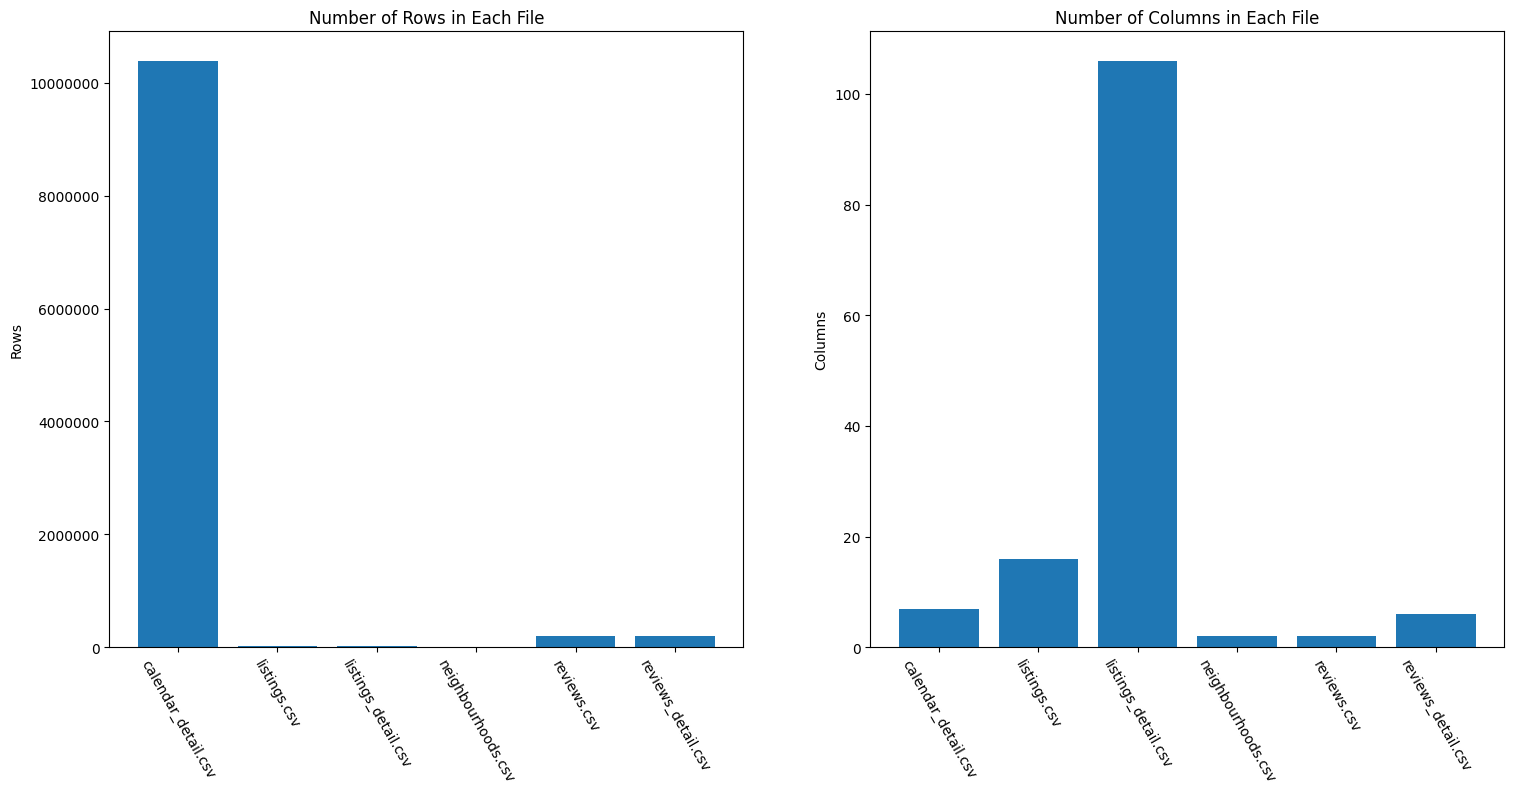

In [49]:
import matplotlib.pyplot as plt

# 数据整理
row_data = [value[0] for key, value in shapes_dict.items()]
col_data = [value[1] for key, value in shapes_dict.items()]

# 创建一个2x1的图形网格，可以并排显示两个图表
fig, axs = plt.subplots(1, 2)

# 行数据柱状图
axs[0].bar(range(len(row_data)), row_data)
axs[0].set_xticks(range(len(row_data)))
axs[0].set_xticklabels([key for key, value in shapes_dict.items()], rotation=-60)
axs[0].set_ylabel('Rows')
axs[0].set_title('Number of Rows in Each File')

# 列数据柱状图
axs[1].bar(range(len(col_data)), col_data)
axs[1].set_xticks(range(len(col_data)))
axs[1].set_xticklabels([key for key, value in shapes_dict.items()], rotation=-60)
axs[1].set_ylabel('Columns')
axs[1].set_title('Number of Columns in Each File')

# 修改y轴刻度标签的格式为科学计数法，并指定小数点后保留几位
axs[0].ticklabel_format(axis='y', scilimits=(0,100))  # 对于行数据柱状图
axs[1].ticklabel_format(axis='y', scilimits=(0,100))  # 对于列数据柱状图

# 显示图形
fig.set_size_inches(18, 8)
plt.show()

为了方便下面处理后导出文件，采用命名处理+函数封装

In [124]:
DATAS = {}

def reload_DATAS():
  import pandas as pd
  for f in DATA_FILES:
    name = f.split('.')[0]
    DATAS[name] = pd.read_csv(os.path.join(SRC_DIR, f), low_memory=False)
  print('ok')

reload_DATAS()

ok


## （2）去除每个数据文件中的重复记录

首先查看每个数据文件中的重复记录情况

In [112]:
for name, df in DATAS.items():
  print('*'*150, f'\n{name}.csv :\n', df[df.duplicated()])

****************************************************************************************************************************************************** 
calendar_detail.csv :
 Empty DataFrame
Columns: [listing_id, date, available, price, adjusted_price, minimum_nights, maximum_nights]
Index: []
****************************************************************************************************************************************************** 
listings.csv :
 Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []
****************************************************************************************************************************************************** 
listings_detail.csv :
 Empty DataFrame
Columns: [id, listing_url, scrape_id, last_scraped, name, summary, space, description, e

可以看出只有 reviews_detail.csv 有重复记录，下面对它进行处理

In [125]:
DATAS['reviews'].drop_duplicates(inplace = True)  # 去重
print(DATAS['reviews'][DATAS['reviews'].duplicated()])

Empty DataFrame
Columns: [listing_id, date]
Index: []


## （3）对每个数据文件中的缺失值、异常值进行处理

查看每个数据文件的缺失值

In [126]:
for name, df in DATAS.items():
  print('*'*150, f'\n{name}.csv')
  print(df.isnull().sum())  # 了解数据的缺失情况


****************************************************************************************************************************************************** 
calendar_detail.csv
listing_id          0
date                0
available           0
price               0
adjusted_price      0
minimum_nights    358
maximum_nights    358
dtype: int64
****************************************************************************************************************************************************** 
listings.csv
id                                    0
name                                  1
host_id                               0
host_name                             0
neighbourhood_group               28452
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review     

In [127]:
for name, df in DATAS.items():
  column_list = df.columns[df.isna().all()].tolist()
  column_str = '\\\n'.join(map(lambda x: ', '.join(x), (column_list[i:i+5] for i in range(0, len(column_list), 5))))
  print(f'\n{name}.csv', ' '*(25-min(len(name),20)), "Empty columns:", column_str) # 完全没有数据的列


calendar_detail.csv            Empty columns: 

listings.csv                   Empty columns: neighbourhood_group

listings_detail.csv            Empty columns: thumbnail_url, medium_url, xl_picture_url, host_acceptance_rate, neighbourhood_group_cleansed

neighbourhoods.csv             Empty columns: neighbourhood_group

reviews.csv                    Empty columns: 

reviews_detail.csv             Empty columns: 


处理缺失值

In [128]:
# calendar_detail.csv
print('>>> calendar_detail.csv')
DATAS['calendar_detail']["minimum_nights"].fillna(1, inplace = True)  # 填充有空值行
DATAS['calendar_detail']["maximum_nights"].fillna(1, inplace = True)  # 填充有空值行

# listings.csv
print('>>> listings.csv')
DATAS['listings'] = DATAS['listings'].drop('neighbourhood_group', axis=1) #删除空列

# listings_detail.csv
print('>>> listings_detail.csv')
def remcolumns(data):
    #删除所有行中缺失值超过99%的列
    t = int(data.shape[0]*0.01)
    print(f'保留至少有 {t} 个非空的列')
    data = data.dropna(thresh=t,axis=1)
    return data
print('删除空列前列数：', len(DATAS['listings_detail'].columns))
DATAS['listings_detail'] = remcolumns(DATAS['listings_detail']) # 缺失超过28000的列基本没用，删去它们
print('删除空列后列数：', len(DATAS['listings_detail'].columns))
DATAS['listings_detail'] = DATAS['listings_detail'][DATAS['listings_detail']['name'].isnull() == 0]  # 删除 price 为 0 的行

# neighbourhoods.csv
print('>>> neighbourhoods.csv')
DATAS['neighbourhoods'] = DATAS['neighbourhoods'].drop('neighbourhood_group', axis=1) #删除空列

# reviews.csv
print('>>> reviews.csv')
pass

# reviews_detail.csv
print('>>> reviews_detail.csv')
DATAS['reviews_detail'] = DATAS['reviews_detail'].drop(DATAS['reviews_detail'][DATAS['reviews_detail']['comments'].isnull()].index) # comments（评论）列的空值对评论分析没用作用，删去它们

>>> calendar_detail.csv
>>> listings.csv
>>> listings_detail.csv
删除空列前列数： 106
保留至少有 284 个非空的列
删除空列后列数： 98
>>> neighbourhoods.csv
>>> reviews.csv
>>> reviews_detail.csv


再次运行代码检查效果

In [134]:
for name, df in DATAS.items():
  print('*'*150, f'\n{name}.csv')
  print(df.isnull().sum())  # 了解数据的缺失情况
# 分两次循环展示，牺牲时间换取更好的显示效果
print()
for name, df in DATAS.items():
  column_list = df.columns[df.isna().all()].tolist()
  column_str = '\\\n'.join(map(lambda x: ', '.join(x), (column_list[i:i+5] for i in range(0, len(column_list), 5))))
  print(f'\n{name}.csv', ' '*(25-min(len(name),20)), "Empty columns:", column_str) # 完全没有数据的列


****************************************************************************************************************************************************** 
calendar_detail.csv
listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64
****************************************************************************************************************************************************** 
listings.csv
id                                    0
name                                  1
host_id                               0
host_name                             0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       11158
reviews_per_month             

尝试洞察每个文件的异常值

In [140]:
DATAS['neighbourhoods']

,neighbourhood
0,东城区
1,丰台区 / Fengtai
2,大兴区 / Daxing
3,密云县 / Miyun
4,平谷区 / Pinggu
5,延庆县 / Yanqing
6,怀柔区 / Huairou
7,房山区
8,昌平区
9,朝阳区 / Chaoyang


In [147]:
for name, df in DATAS.items():
  non_numeric_columns = df.select_dtypes(exclude=['number']).columns
  _n = df.loc[:, df.columns.isin(non_numeric_columns)]
  _nn = df.loc[:, ~df.columns.isin(non_numeric_columns)]
  print('*'*150, f'\n{name}.csv\n{_n.describe()}','\n\n', _nn.apply(lambda x: '' if x.empty else x.describe()))
  # lambda函数，它对空的df返回一个空字符串，避免空df.describe()报错

****************************************************************************************************************************************************** 
calendar_detail.csv
              date available     price adjusted_price
count     10384980  10384980  10384980       10384980
unique         365         2      4493           4517
top     2019-04-17         t   $398.00        $398.00
freq         28452   6313432    180959         178916 

          listing_id  minimum_nights  maximum_nights
count  1.038498e+07    1.038498e+07    1.038498e+07
mean   2.628583e+07    2.728729e+00    3.611174e+04
std    6.403200e+06    1.754379e+01    5.928377e+06
min    4.405400e+04    1.000000e+00    1.000000e+00
25%    2.245616e+07    1.000000e+00    1.125000e+03
50%    2.787765e+07    1.000000e+00    1.125000e+03
75%    3.134482e+07    1.000000e+00    1.125000e+03
max    3.395441e+07    1.125000e+03    1.000000e+09
***************************************************************************************

处理异常值

In [149]:
# calendar_detail.csv
df = DATAS['calendar_detail']
df[df.columns[3:5]] = df[df.columns[3:5]].replace('[\$,]', '', regex=True).astype(float)
pd.set_option('display.float_format', lambda x:'%.2f'%x) # 小数点后面保留2位小数
df = df.drop(df[df.price==1].index) #删去明显不正常的数据
df = df.drop(df[df.maximum_nights>1125*3].index) #删去明显不正常的数据

# listings.csv
df = DATAS['listings']
print(df[['price','minimum_nights','number_of_reviews','last_review','reviews_per_month',\
          'calculated_host_listings_count','availability_365']].describe(percentiles=[.75, .99]))  #对数据进行描述性统计分析
df['neighbourhood'] = df['neighbourhood'].apply(lambda x: x.split('/')[0])  # 保留neighbourhood中文，去除 / 后面英文
df['neighbourhood'] = df['neighbourhood'].str.replace(' ','') # 删除空格
df = df[df['price'] != 0]  # 删除 price 为 0 的行
print("Compare 'number_of_reviews' & 'last_review' & 'reviews_per_month' :", df[df['number_of_reviews']==0].index.to_list()\
      == df[df['last_review'].isnull()].index.to_list() == df[df['reviews_per_month'].isnull()].index.to_list()) # True 表示三列异常值位置完全一致
print("-" * 150)
# 单独处理这些没有访问量的数据
df0 = df[df['last_review'].isnull()]
df0.to_csv(os.path.join(SRC_DIR, '_listings_reviews0.csv'))
del df0
df = df.drop(df[df['number_of_reviews']==0].index)
df.dropna(axis=0,how='any')
df = df.drop(df[df['availability_365']==0].index)
print("-" * 150)
print(df[['price','minimum_nights','number_of_reviews','last_review','reviews_per_month',\
          'calculated_host_listings_count','availability_365']].describe(percentiles=[.75, .99]))  #对数据进行描述性统计分析

# listings_detail.csv
df = DATAS['listings_detail']
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].apply(
    lambda x: x.split('/')[0])  # 保留 neighbourhood 中文，去除/后面英文

# neighbourhoods.csv
df = DATAS['neighbourhoods']
df['neighbourhood'] = df['neighbourhood'].apply(lambda x: x.split('/')[0])  # 保留neighbourhood中文，去除 / 后面英文

# reviews.csv
df = DATAS['reviews']
table = pd.pivot_table(df,index=['date'],values=['listing_id'],aggfunc='count') # 尝试生成透视表，成功则接下来可以用于绘制时间序列图
print(table)

# reviews_detail.csv
df = DATAS['reviews_detail']
table = pd.pivot_table(df,index=['date'],values=['listing_id'],aggfunc='count') # 尝试生成透视表，成功则接下来可以用于绘制时间序列图
print(table)

         price  minimum_nights  number_of_reviews  reviews_per_month  calculated_host_listings_count  availability_365
count 28452.00        28452.00           28452.00           17294.00                        28452.00          28452.00
mean    611.20            2.73               7.10               1.32                           12.82            220.34
std    1623.54           17.92              16.82               1.58                           29.26            138.43
min       0.00            1.00               0.00               0.01                            1.00              0.00
50%     389.00            1.00               1.00               0.80                            5.00            209.00
75%     577.00            1.00               6.00               1.75                           11.00            361.00
99%    4402.00           30.00              84.00               7.32                          210.00            365.00
max   68983.00         1125.00             322.0

## （4）将数据文件中的中文、英文文本分割为单独文件

根据后面的需求，只需要对 reviews_detail.csv 进行中英文分割

In [150]:
df = DATAS['reviews_detail']

DATAS['reviews_detail_Chinese'] = df[(df['comments'] >= '\u4e00') & (df['comments'] <= u'\u9fa5')].copy()
DATAS['reviews_detail_Chinese']["reviewer_name"].fillna("佚名", inplace = True)  # 填充有空值行
print("Chinese：", DATAS['reviews_detail_Chinese'].shape)

DATAS['reviews_detail_English'] = df.drop(df[(df['comments'] >= '\u4e00') & (df['comments'] <= u'\u9fa5')].index).copy()
DATAS['reviews_detail_English']["reviewer_name"].fillna("Anonymous", inplace = True)  # 填充有空值行
print("English：", DATAS['reviews_detail_English'].shape)

Chinese： (169070, 6)
English： (32912, 6)


---

## 单独处理 neighbourhoods.geojso

In [151]:
import geopandas as gpd
print("neighbourhoods.geojson -> _neighbourhoods.geojson")
print("*" * 150)
DATAS['neighbourhoods_geojson'] = gpd.GeoDataFrame.from_file(
    os.path.join(SRC_DIR, "neighbourhoods.geojson"), encoding="utf-8"
)  # 读取数据为geodataframe格式
print("处理前：", DATAS['neighbourhoods_geojson'].shape)
DATAS['neighbourhoods_geojson'].drop('neighbourhood_group',axis = 1,inplace = True)
DATAS['neighbourhoods_geojson']['neighbourhood'] = DATAS['neighbourhoods_geojson']['neighbourhood'].apply(lambda x: x.split('/')[0])  # 保留neighbourhood中文，去除 / 后面英文
DATAS['neighbourhoods_geojson']['neighbourhood'] = DATAS['neighbourhoods_geojson']['neighbourhood'].str.replace(' ','') # 删除空格
print("处理后：", DATAS['neighbourhoods_geojson'].shape)
print("_"*68," Good job ! ","_"*68)

neighbourhoods.geojson -> _neighbourhoods.geojson
******************************************************************************************************************************************************
处理前： (16, 3)
处理后： (16, 2)
____________________________________________________________________  Good job !  ____________________________________________________________________


## 导出结果为文件

In [152]:

print("calendar_detail.csv -> _calendar_detail.csv")
DATAS['calendar_detail'].to_csv(os.path.join(SRC_DIR, '_calendar_detail.csv'))

print("listings.csv -> _listings.csv")
DATAS['listings'].to_csv(os.path.join(SRC_DIR, '_listings.csv'))

print("listings_detail.csv -> _listings_detail.csv")
DATAS['listings_detail'].to_csv(os.path.join(SRC_DIR, '_listings_detail.csv'))

print("neighbourhoods.csv -> _neighbourhoods.csv")
DATAS['neighbourhoods'].to_csv(os.path.join(SRC_DIR, '_neighbourhoods.csv'))

print("neighbourhoods.geojson -> _neighbourhoods.geojson")
DATAS['neighbourhoods_geojson'].to_file(os.path.join(SRC_DIR, '_neighbourhoods.geojson'), driver='GeoJSON')

print("reviews.csv -> _reviews.csv")
DATAS['reviews'].to_csv(os.path.join(SRC_DIR, '_reviews.csv'))

print("reviews_detail.csv -> _reviews_detail_chinese.csv + _reviews_detail_english.csv")
DATAS['reviews_detail_Chinese'].to_csv(os.path.join(SRC_DIR, '_reviews_detail_chinese.csv'))
DATAS['reviews_detail_English'].to_csv(os.path.join(SRC_DIR, '_reviews_detail_english.csv'))

print("_"*68," Good job ! ","_"*68)

calendar_detail.csv -> _calendar_detail.csv
listings.csv -> _listings.csv
listings_detail.csv -> _listings_detail.csv
neighbourhoods.csv -> _neighbourhoods.csv
neighbourhoods.geojson -> _neighbourhoods.geojson
reviews.csv -> _reviews.csv
reviews_detail.csv -> _reviews_detail_chinese.csv + _reviews_detail_english.csv
____________________________________________________________________  Good job !  ____________________________________________________________________


#
\- The End -